In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DigiPythonTools import DataUtility

In [47]:
min_sql = DataUtility()
# query = 'SELECT MIN(TagDateTime) AS mintime, MAX(TagDateTime) AS maxtime  FROM DigiProcessInfo.tblLpFmRtFceTrendData '
query_march = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2024-03-%';
"""

query_december = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2023-12-%';
"""

query_november = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2023-11-%';
"""
march_df = min_sql.min_query(query_march)
december_df = min_sql.min_query(query_december)
november_df = min_sql.min_query(query_november)

	opening conn from file
	conn opened


C:\Users\sk5261\PycharmProjects\pythonProject4\.venv\lib\site-packages\DigiPythonTools\MinimumSQLUtility.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res_df = pd.read_sql_query(sql_str, self.conn)


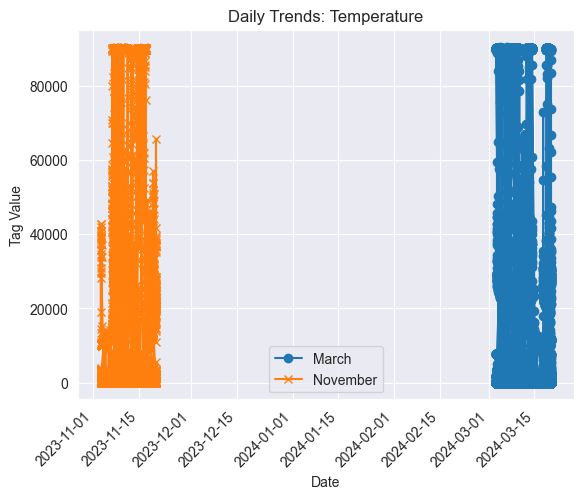

In [59]:

plt.plot(march_df['TagDateTime'], march_df['TagValue'], label='March', marker='o')
plt.plot(november_df['TagDateTime'], november_df['TagValue'], label='November', marker='x')
plt.xlabel('Date')
plt.ylabel('Tag Value')
plt.title('Daily Trends: Temperature')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

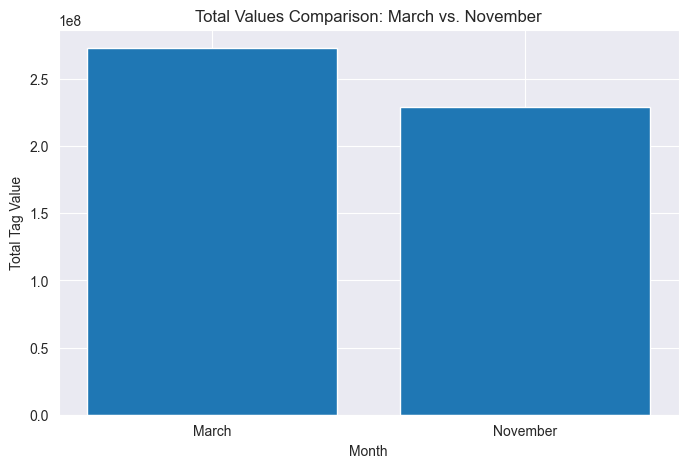

In [51]:
# Calculate total values for March and November
march_total = march_df['TagValue'].sum()
november_total = november_df['TagValue'].sum()

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(['March', 'November'], [march_total, november_total])
plt.xlabel('Month')
plt.ylabel('Total Tag Value')
plt.title('Total Values Comparison: March vs. November')
plt.show()


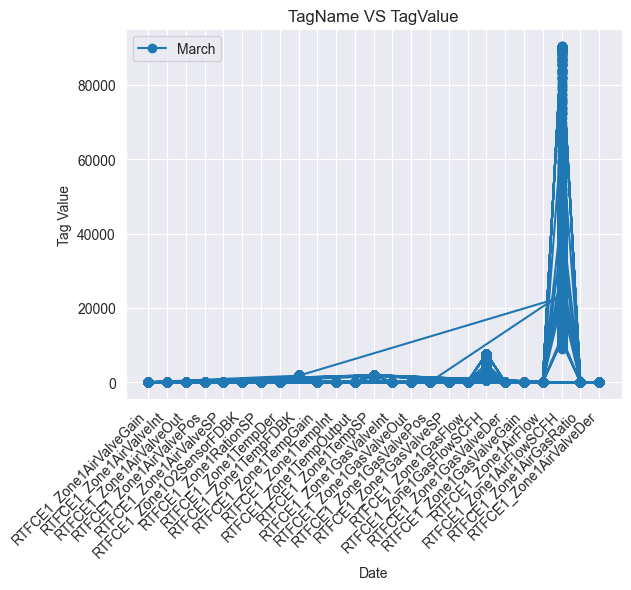

In [58]:
plt.plot(march_df['TagName'], march_df['TagValue'], label='March', marker='o')
plt.xlabel('Date')
plt.ylabel('Tag Value')
plt.title('TagName VS TagValue')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

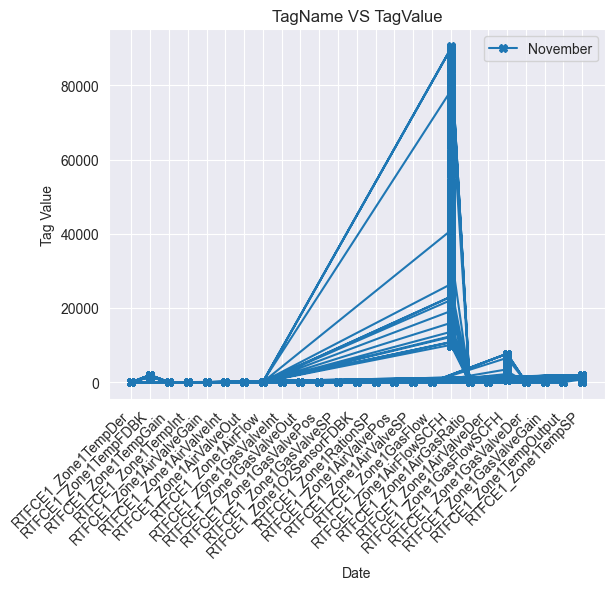

In [57]:
plt.plot(november_df['TagName'], november_df['TagValue'], label='November', marker='X')
plt.xlabel('Date')
plt.ylabel('Tag Value')
plt.title('TagName VS TagValue')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

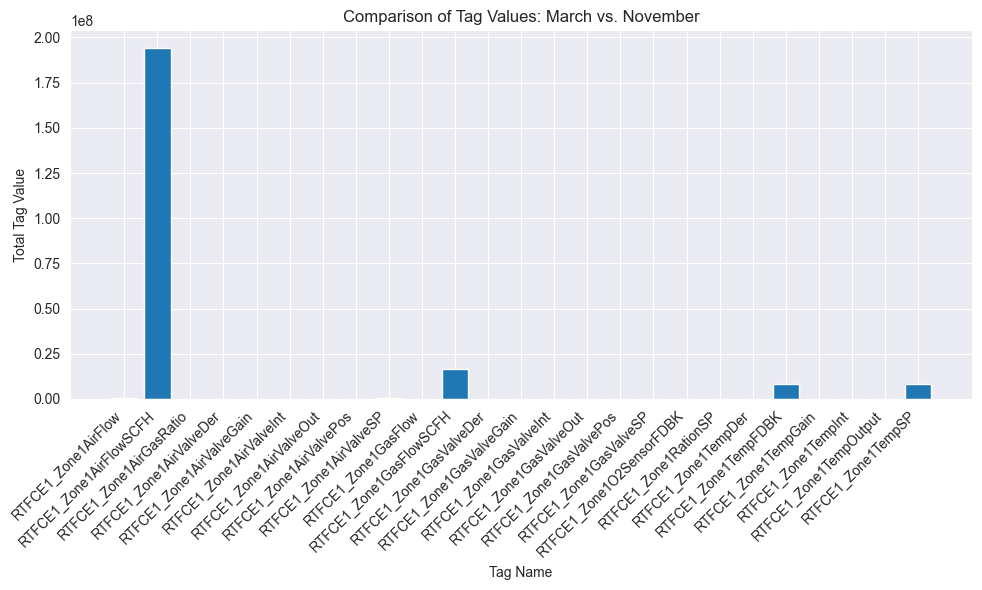

In [55]:
tag_totals = november_df.groupby('TagName')['TagValue'].sum()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(tag_totals.index, tag_totals.values)
plt.xlabel('Tag Name')
plt.ylabel('Total Tag Value')
plt.title('Comparison of Tag Values: November')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [60]:
print(tag_totals)

TagName
RTFCE1_Zone1AirFlow         3.047535e+05
RTFCE1_Zone1AirFlowSCFH     2.333092e+08
RTFCE1_Zone1AirGasRatio     5.843125e+03
RTFCE1_Zone1AirValveDer     4.913000e+02
RTFCE1_Zone1AirValveGain    3.684750e+03
RTFCE1_Zone1AirValveInt     2.456500e+03
RTFCE1_Zone1AirValveOut     2.596303e+05
RTFCE1_Zone1AirValvePos     2.644346e+05
RTFCE1_Zone1AirValveSP      3.063225e+05
RTFCE1_Zone1GasFlow         2.587311e+05
RTFCE1_Zone1GasFlowSCFH     1.980855e+07
RTFCE1_Zone1GasValveDer     4.913000e+02
RTFCE1_Zone1GasValveGain    3.684750e+03
RTFCE1_Zone1GasValveInt     2.456500e+03
RTFCE1_Zone1GasValveOut     2.648492e+05
RTFCE1_Zone1GasValvePos     2.672977e+05
RTFCE1_Zone1GasValveSP      2.581437e+05
RTFCE1_Zone1O2SensorFDBK    0.000000e+00
RTFCE1_Zone1RationSP        5.717780e+03
RTFCE1_Zone1TempDer         0.000000e+00
RTFCE1_Zone1TempFDBK        8.551085e+06
RTFCE1_Zone1TempGain        4.421700e+04
RTFCE1_Zone1TempInt         4.913000e+03
RTFCE1_Zone1TempOutput      2.619489e+05
RTFCE1_Z

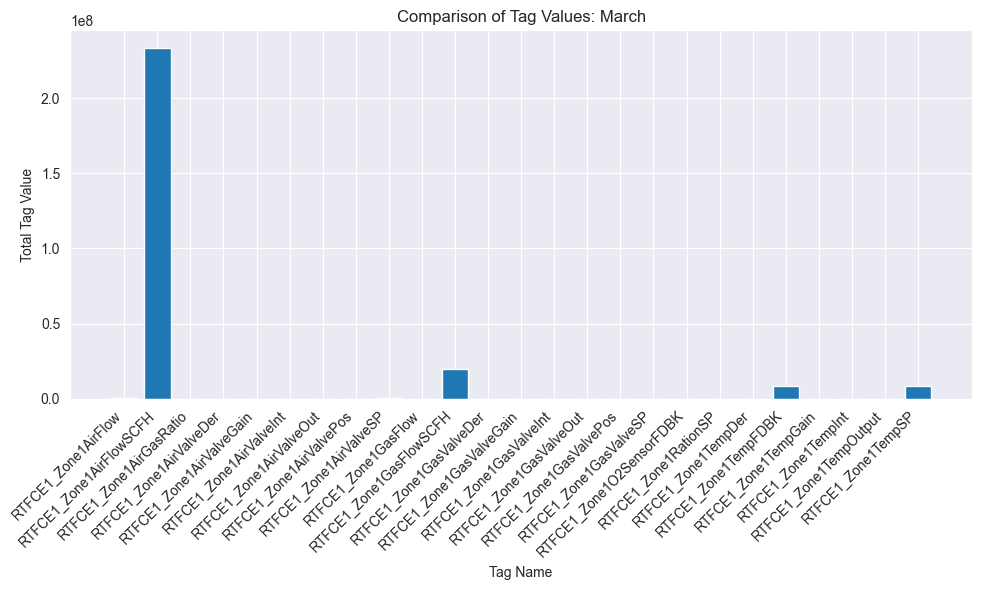

In [61]:
tag_totals = march_df.groupby('TagName')['TagValue'].sum()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(tag_totals.index, tag_totals.values)
plt.xlabel('Tag Name')
plt.ylabel('Total Tag Value')
plt.title('Comparison of Tag Values: March')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
march_daily = march_df.resample('D').mean(numeric_only=True)
december_daily = december_df.resample('D').mean(numeric_only=True)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [5]:
march_df.describe()

,TagDateTime,TagValue
count,122825,122825.000000
mean,2024-03-11 17:00:00.000000512,2222.971971
min,2024-03-03 05:00:00,0.000000
25%,2024-03-07 11:00:00,0.750000
50%,2024-03-11 17:00:00,12.908643
75%,2024-03-15 23:00:00,96.618715
max,2024-03-20 05:00:00,90442.467421
std,NaN,11520.373422


In [62]:
november_df.describe()

,TagDateTime,TagValue
count,122825,122825.000000
mean,2023-11-11 16:00:00,1868.049924
min,2023-11-03 04:00:00,0.000000
25%,2023-11-07 10:00:00,0.750000
50%,2023-11-11 16:00:00,11.733549
75%,2023-11-15 22:00:00,88.446832
max,2023-11-20 04:00:00,90593.769227
std,NaN,9998.581523


In [7]:
march_daily = march_df.resample('D')['TagValue'].mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [10]:
march_df.head()

,TagName,TagDateTime,TagValue
0,RTFCE1_Zone1AirValveGain,2024-03-15 07:30:00,0.75
1,RTFCE1_Zone1AirValveGain,2024-03-15 07:35:00,0.75
2,RTFCE1_Zone1AirValveGain,2024-03-15 07:40:00,0.75
3,RTFCE1_Zone1AirValveGain,2024-03-15 07:45:00,0.75
4,RTFCE1_Zone1AirValveGain,2024-03-15 07:50:00,0.75


In [11]:
march_df['TagDateTime'] = pd.to_datetime(march_df['TagDateTime'])


In [12]:
march_df.head()

,TagName,TagDateTime,TagValue
0,RTFCE1_Zone1AirValveGain,2024-03-15 07:30:00,0.75
1,RTFCE1_Zone1AirValveGain,2024-03-15 07:35:00,0.75
2,RTFCE1_Zone1AirValveGain,2024-03-15 07:40:00,0.75
3,RTFCE1_Zone1AirValveGain,2024-03-15 07:45:00,0.75
4,RTFCE1_Zone1AirValveGain,2024-03-15 07:50:00,0.75


In [13]:
march_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122825 entries, 0 to 122824
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   TagName      122825 non-null  object        
 1   TagDateTime  122825 non-null  datetime64[ns]
 2   TagValue     122825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.8+ MB


In [14]:
march_df.set_index('TagDateTime', inplace=True)


In [15]:
march_df.head()

,TagName,TagValue
TagDateTime,,
2024-03-15 07:30:00,RTFCE1_Zone1AirValveGain,0.75
2024-03-15 07:35:00,RTFCE1_Zone1AirValveGain,0.75
2024-03-15 07:40:00,RTFCE1_Zone1AirValveGain,0.75
2024-03-15 07:45:00,RTFCE1_Zone1AirValveGain,0.75
2024-03-15 07:50:00,RTFCE1_Zone1AirValveGain,0.75


In [16]:
march_daily = march_df.resample('D')['TagValue'].mean()


In [17]:
march_daily.head()


TagDateTime
2024-03-03    3384.036600
2024-03-04    3256.027708
2024-03-05    1455.907398
2024-03-06    2391.026170
2024-03-07    4064.916240
Freq: D, Name: TagValue, dtype: float64

In [40]:
december_df.set_index('TagDateTime', inplace=True)
november_df.set_index('TagDateTime', inplace=True)

In [41]:
december_daily = december_df.resample('D')['TagValue'].mean()
november_daily = november_df.resample('D')['TagValue'].mean()

In [21]:
# Descriptive statistics
print(march_daily.describe())


count      18.000000
mean     2219.656076
std      1033.902494
min       616.869202
25%      1614.713133
50%      2284.470368
75%      2670.981090
max      4064.916240
Name: TagValue, dtype: float64


In [44]:
print(november_daily.describe())

count      18.000000
mean     1830.780993
std      1128.948773
min       644.497109
25%      1013.682586
50%      1331.706306
75%      2686.965270
max      4035.258785
Name: TagValue, dtype: float64


In [25]:
# Plot time series
plt.figure(figsize=(14, 7))

plt.plot(march_daily.index, march_daily['TagValue'], label='March')
plt.plot(december_daily.index, december_daily['TagValue'], label='December')

plt.title('Tag Values Comparison')
plt.xlabel('Date')
plt.ylabel('Tag Value')
plt.legend()
plt.show()


KeyError: 'TagValue'

<Figure size 1400x700 with 0 Axes>

In [30]:
column_name = march_daily.name
print(column_name)


TagValue


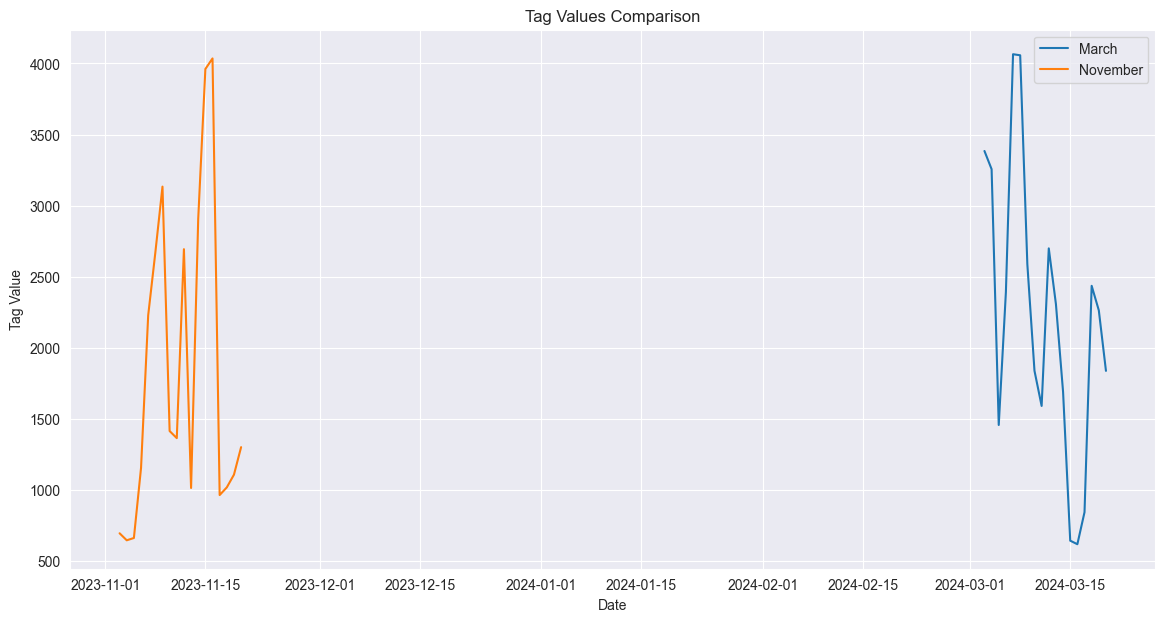

In [46]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(march_daily.index, march_daily, label='March')
plt.plot(november_daily.index, november_daily, label='November')

plt.title('Tag Values Comparison')
plt.xlabel('Date')
plt.ylabel('Tag Value')
plt.legend()
plt.show()